# Utils

In [0]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

convergeTime = 100
transientTime = 500
sigma = 1.0
memory = 5
k = 6

# G(i) = i
def strength(i):
  return 0.8 * i + 0.4 * math.ceil(i/2.0) + np.random.normal(0, sigma)


def nextPosition(i):
  return (i + 1) % k


def shuffleFloors():
  floors = []
  for i in range(k):
    floors.append(i + 1)
  random.shuffle(floors)
  return floors


def test_automata(model):
  totalScores = [0] * k
  avgTime = [0] * 100
  acc = [0] * 100
  accOne = [0] * 100
  found = 0
  foundOptimal = 0
  phaseToTestAcc = 10.0
  accuac = np.zeros((100, k))

  for test in range (0, 100):
    floors = shuffleFloors()
    score = [0] * k
    model.reset()

    correct = 0
    correctOptimal = 0
    speed = True
    speedOptimal = True
    for transient in range(0, transientTime):
      bestFloor = np.argmin([strength(floors[i]) for i in range(k)])
      if np.argmin(floors) == model.position:
        correct += 1
      if bestFloor == model.position:
        correctOptimal += 1
      if speed and transient % phaseToTestAcc == 0 and \
        transient != 0 and correct / (phaseToTestAcc) >= 0.9:
        speed = False
        found += transient
      if speedOptimal and transient % phaseToTestAcc == 0 and \
        transient != 0 and correctOptimal / (phaseToTestAcc) >= 0.9:
        speedOptimal = False
        foundOptimal += transient
      if transient % phaseToTestAcc == 0:
        correct = 0
        correctOptimal = 0
      model.update(bestFloor)
    
    for converge in range(0, convergeTime):
      score[floors[model.get_position()] - 1] += 1
      accuac[test][floors[model.get_position()] - 1] += 1
      avgTime[test] += strength(floors[model.get_position()])
      #print(avgTime[test], floors[model.get_position()])
      #raise E()
      bestFloor = np.argmin([strength(floors[i]) for i in range(k)])
      if model.position == bestFloor:
        acc[test] += 1
      if model.position == np.argmin(floors):
        accOne[test] += 1
      model.update(bestFloor)
    
    score = np.divide(score, convergeTime)
    totalScores = np.add(totalScores, score)
    accuac[test] = np.divide(accuac[test], 100)

  totalScores = np.divide(totalScores, 100)
  avgTime = np.divide(avgTime, 100)
  acc = np.divide(acc, 100)
  accOne = np.divide(accOne, 100)
  print(totalScores)
  print(correct)
  print("speed", found / 100)
  print("speed optimal", foundOptimal / 100)
  plt.plot(sorted(shuffleFloors()), totalScores, '-ok');
  plt.title("Accuracy")
  plt.show()
  plt.plot(np.arange(100), avgTime, '-ok');
  plt.title("Average time")
  plt.show()
  plt.plot(np.arange(100), acc, '-ok');
  plt.title("Average accuracy (correctly picking optimal floor)")
  plt.show()
  plt.plot(np.arange(100), accOne, '-ok');
  plt.title("Picking floor 1")
  plt.show()
  
  plt.plot(np.arange(100), accuac[:, 0], '-ob', label="floor 1");
  plt.plot(np.arange(100), accuac[:, 1], '-og', label="floor 2");
  plt.plot(np.arange(100), accuac[:, 2], '-or', label="floor 3");
  plt.plot(np.arange(100), accuac[:, 3], '-oc', label="floor 4");
  plt.plot(np.arange(100), accuac[:, 4], '-om', label="floor 5");
  plt.plot(np.arange(100), accuac[:, 5], '-ok', label="floor 6");
  plt.title("Acc")
  plt.legend(loc="upper right")
  plt.show()

class baseAutomata:
  def __init__(self):
    self.depth = 0
    self.position = 0

  def reset(self):
    self.depth = 0
    self.position = 0

  def get_position(self):
    return self.position


In [2]:
for i in [1, 2, 3, 4, 5, 6]:
  sumA = 0
  for j in range(1000):
    sumA += strength(i)
  print("f_" + str(i), sumA/1000)

f_1 1.1758413646620756
f_2 2.0616753185870027
f_3 3.1777590444374577
f_4 3.9744403260862726
f_5 5.248391636469051
f_6 5.99189232559572


In [3]:
count = 0
for i in range(1000):
  if np.argmin([strength(i + 1) for i in range(k)]) + 1 == 1:
    count += 1
print(count / 1000)

0.688


# Tsetlin

[0.9739 0.011  0.0037 0.0039 0.0038 0.0037]
9
speed 22.6
speed optimal 83.7


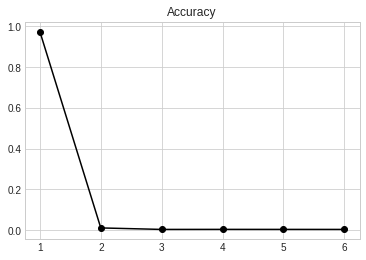

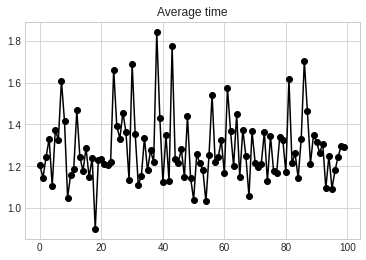

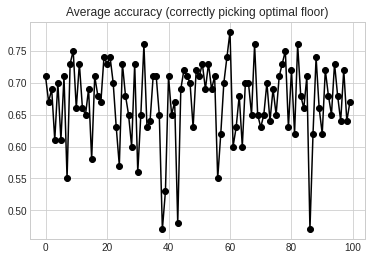

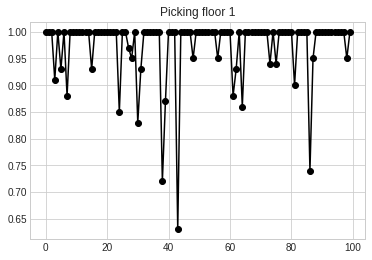

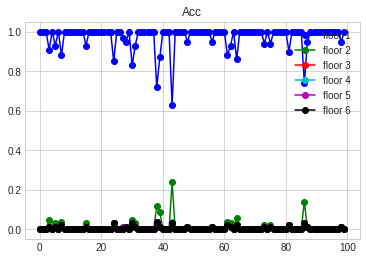

CPU times: user 3.03 s, sys: 9.84 ms, total: 3.04 s
Wall time: 3.07 s


In [4]:
class tsetlin(baseAutomata):
  def update(self, optimalPosition):
      if optimalPosition != self.position:
        if self.depth == 0:
          self.position = nextPosition(self.position)
        else:
          self.depth -= 1
      else:
        self.depth = min(self.depth + 1, memory)

%time test_automata(tsetlin())

# Krinsky

[0.9911 0.0037 0.0022 0.001  0.001  0.001 ]
9
speed 25.7
speed optimal 91.3


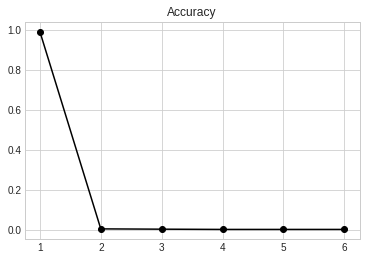

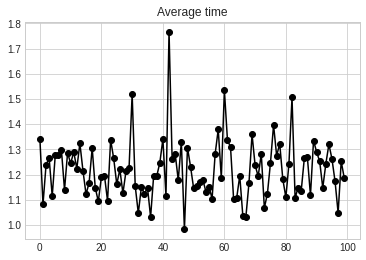

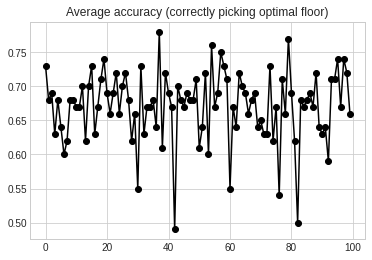

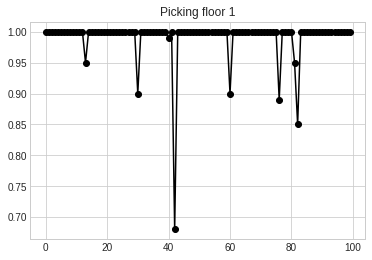

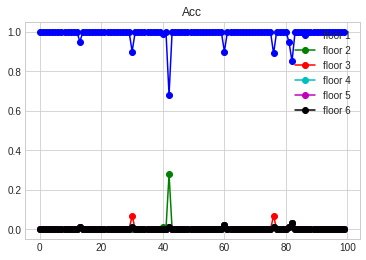

CPU times: user 3.1 s, sys: 19.6 ms, total: 3.12 s
Wall time: 3.13 s


In [5]:
class krinsky(baseAutomata):
  def update(self, optimalPosition):
      if optimalPosition != self.position:
        if self.depth == 0:
          self.position = nextPosition(self.position)
        else:
          self.depth -= 1
      else:
        self.depth = memory

%time test_automata(krinsky())

# Krylov

[9.554e-01 3.000e-02 8.500e-03 5.800e-03 2.000e-04 1.000e-04]
9
speed 93.7
speed optimal 131.1


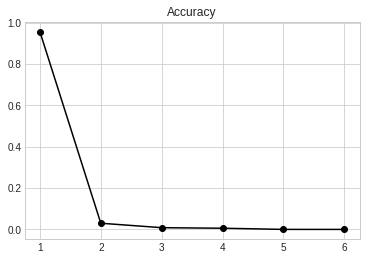

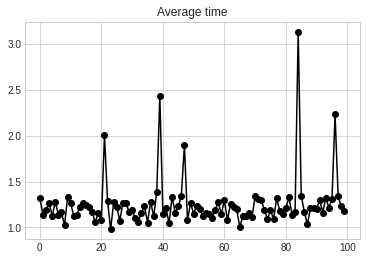

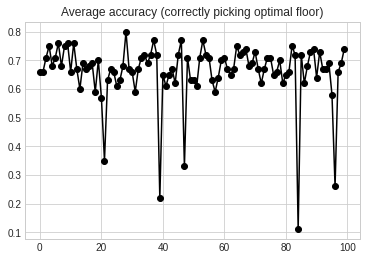

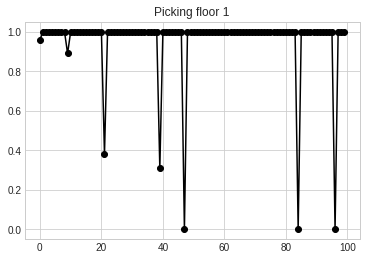

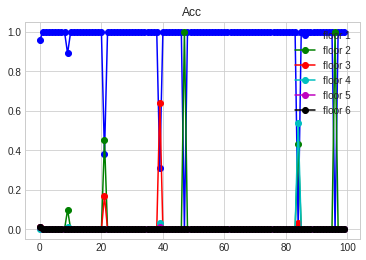

CPU times: user 3.02 s, sys: 17.8 ms, total: 3.04 s
Wall time: 3.06 s


In [6]:
  # def update(self, optimalPosition):
  #     if optimalPosition != self.position:
  #       if self.depth == 0:
  #         self.position = nextPosition(self.position)
  #       else:
  #         self.depth -= 1
  #     else:
  #       self.depth = min(self.depth + 1, memory)

class krylov(baseAutomata):
  def update(self, optimalPosition):
      if optimalPosition != self.position:
        if bool(random.getrandbits(1)):
          if self.depth == 0:
            self.position = nextPosition(self.position)
          else:
            self.depth -= 1
        else:
          self.depth = min(self.depth + 1, memory)
      else:
        self.depth = min(self.depth + 1, memory)

%time test_automata(krylov())

#L_RI

[0.98 0.02 0.   0.   0.   0.  ]
9
speed 38.4
speed optimal 107.4


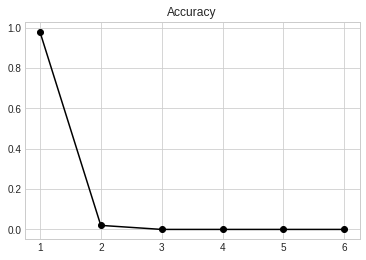

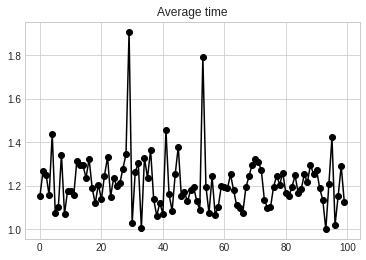

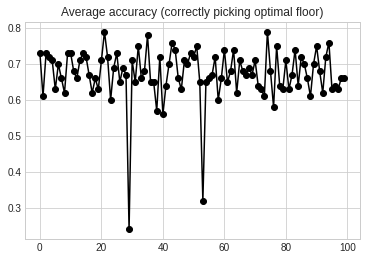

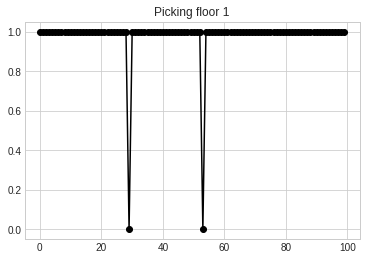

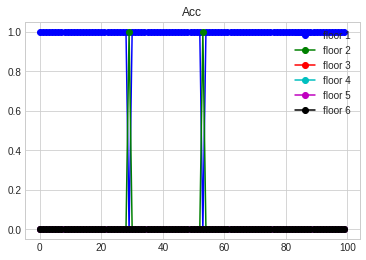

CPU times: user 5.7 s, sys: 16.6 ms, total: 5.72 s
Wall time: 5.74 s


In [7]:
#LR = 0.03
LR = 0.2

class LRI(baseAutomata):
  def __init__(self):
      super(LRI, self).__init__()
      self.prob = [1.0/k for _ in range(k)]
      self.position = np.random.choice(np.arange(0, k), p=self.prob)

  def reset(self):
      super(LRI, self).reset()
      self.prob = [1.0/k for _ in range(k)]
      self.position = np.random.choice(np.arange(0, k), p=self.prob)

  def get_position(self):
      self.position = np.random.choice(np.arange(0, k), p=self.prob)
      return self.position

  def update(self, optimalPosition):
      if optimalPosition == self.position:
        #print("before", self.position, self.prob)
        for i in range(len(self.prob)):
          if i == self.position:
            self.prob[i] = self.prob[i] + LR * (1 - self.prob[i])
          else:
            self.prob[i] = (1 - LR) * self.prob[i]
        #print("after", self.prob)
        #raise Exception()
      self.position = np.random.choice(np.arange(0, k), p=self.prob)


%time test_automata(LRI())